
# Simple AutoEncoders with Image Data

Here is a simple autoencoder with just the dense layers.

Load the data and import the libraries.

In [1]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import relevant Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Sequential

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:

# Load MNIST data and store it in variables x_train, x_test. Note -  we do not need labels as it's autoencoder.

from keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()


In [5]:
print(tf.__version__)

2.15.0


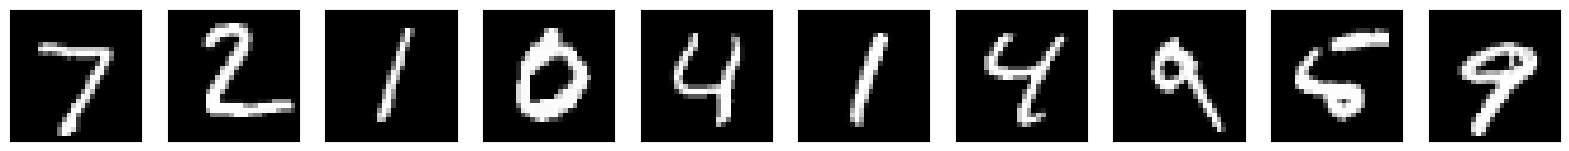

In [6]:
# Plot a few data points
%matplotlib inline

n = 10  # Number of records that will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [7]:
# Normalize train data - Divide by 255
# Normalize test data - Divide by 255
x_train = x_train / 255.0
x_test = x_test / 255.0

## Basic AutoEncoder

Build a basic symmetric encoder-decoder network that recreates the image.  This network could be used in dimensionaliry reduction or feature learning. 

In [8]:
from tensorflow.keras.layers import Flatten,Dense,Reshape


In [9]:
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))

# Add as many hidden layers in the encoder network of your choise
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
# The last TWO layers of the encoder and decoder must be matched (see the following decoder cell.


In [10]:
# print the encoder model
print(encoder.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
Total params: 419350 (1.60 MB)
Trainable params: 419350 (1.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [11]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[50],activation='relu'))

# Add as many layers in the decoder as you want. Reember - Encoder and decoder need to be symmetric.
decoder.add(Dense(400,activation="relu"))
decoder.add(Dense(200,activation="relu"))
decoder.add(Dense(100,activation="relu"))
decoder.add(Dense(50,activation="relu"))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [12]:
# print the decoder model
print(encoder.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
Total params: 419350 (1.60 MB)
Trainable params: 419350 (1.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [13]:
autoencoder = Sequential([encoder, decoder]) # Combine encoder and decoder together.


In [14]:
# print the autoencoder model
print(autoencoder.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 50)                419350    
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            168284    
                                                                 
Total params: 587634 (2.24 MB)
Trainable params: 587634 (2.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [21]:
# Compile the autoencoder. Use binary_crossentropy as loss and metrics as accuracy.
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
# Fit the autoencoder. Note - Input and output are same. x_train is your train data, x_test is your validation data.
# Compile and fit the autoencoder
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/10


1875/1875 [==============================] - 11s 5ms/step - loss: 0.1798 - accuracy: 0.1717 - val_loss: 0.1394 - val_accuracy: 0.2065
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1304 - accuracy: 0.2229 - val_loss: 0.1218 - val_accuracy: 0.2327
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1178 - accuracy: 0.2403 - val_loss: 0.1117 - val_accuracy: 0.2459
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1102 - accuracy: 0.2511 - val_loss: 0.1058 - val_accuracy: 0.2504
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1055 - accuracy: 0.2597 - val_loss: 0.1022 - val_accuracy: 0.2674
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1016 - accuracy: 0.2678 - val_loss: 0.0981 - val_accuracy: 0.2709
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0984 - accuracy: 0.2734 - val_loss: 0.0976 - val_accura

313/313 [==============================] - 1s 2ms/step


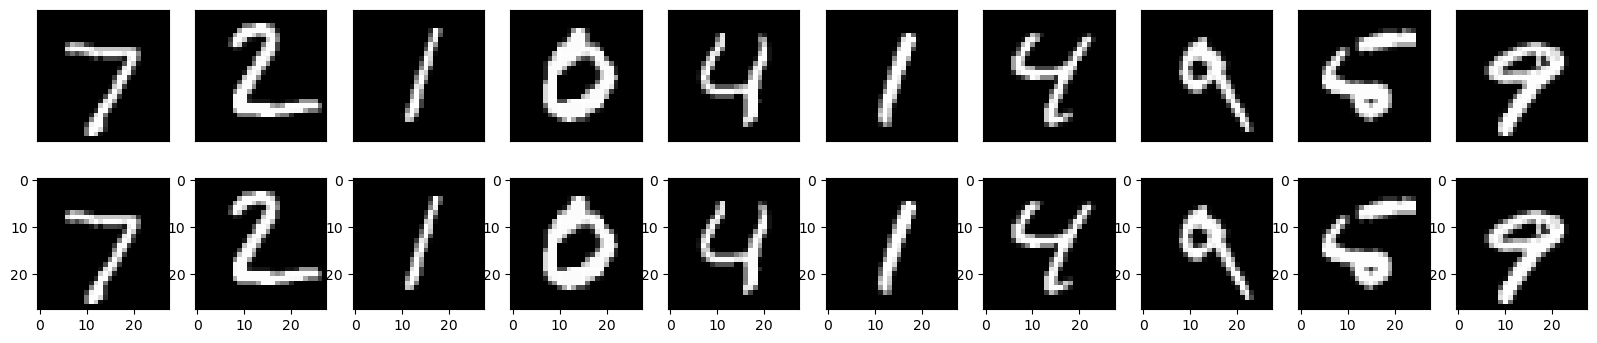

In [49]:
# Check a few sample images.
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    # 
    # Display original image - Just line sample code provided earlier.
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # 
    # Display reconstruced (decoded) images. You need to slightly change your code.
    ax = plt.subplot(2, n, i + 1+n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
    
plt.show()

# AutoEncoders for Denoising Images

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 

In [24]:
from tensorflow.keras.layers import GaussianNoise

In [25]:
sample = GaussianNoise(0.2)
noisey = sample(x_test[0:2],training=True)

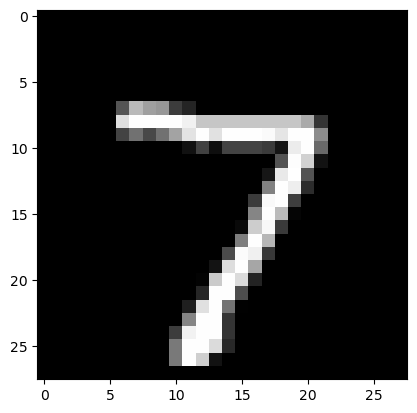

In [26]:
plt.imshow(x_test[0])

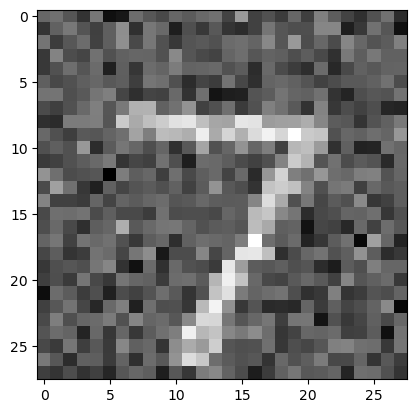

In [27]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

# Input - Images with noise
# Labels - Clean images.

In [28]:

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2)) # We are adding noise to make input as noisy image
#
# Add layers of encoder network. You could use same number of layers as earlier.
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))


In [29]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[50],activation='relu'))

#
# Add layers of decoder network. You could use same number of layers as earlier.
decoder.add(Dense(400,activation="relu"))
decoder.add(Dense(200,activation="relu"))
decoder.add(Dense(100,activation="relu"))
decoder.add(Dense(50,activation="relu"))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [30]:
noise_remover = Sequential([encoder, decoder])

In [36]:
# Compile the network as earlier
noise_remover.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
# Fit the network as earlier.
noise_remover.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1893 - accuracy: 0.1540 - val_loss: 0.1483 - val_accuracy: 0.2018
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1413 - accuracy: 0.2134 - val_loss: 0.1294 - val_accuracy: 0.2235
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1265 - accuracy: 0.2323 - val_loss: 0.1170 - val_accuracy: 0.2460
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1184 - accuracy: 0.2438 - val_loss: 0.1103 - val_accuracy: 0.2470
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1136 - accuracy: 0.2520 - val_loss: 0.1065 - val_accuracy: 0.2555
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1099 - accuracy: 0.2589 - val_loss: 0.1035 - val_accuracy: 0.2681
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1068 - accuracy: 0.2641 - val_loss: 0.1006 - val_accurac

In [38]:
ten_noisey_images = sample(x_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


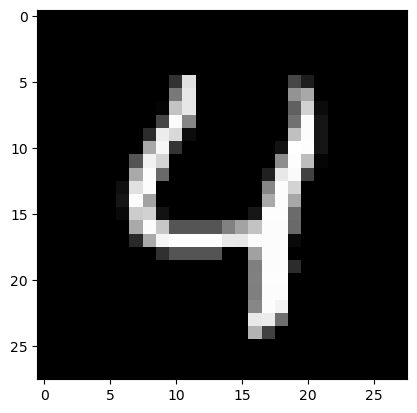

The Noisey Version


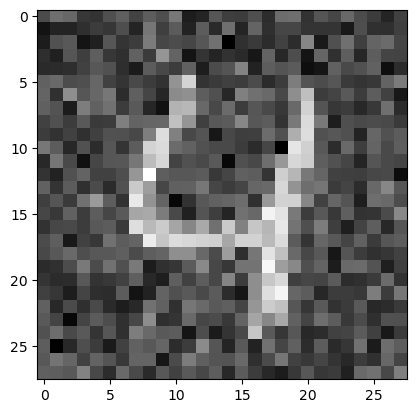

After going through denoiser


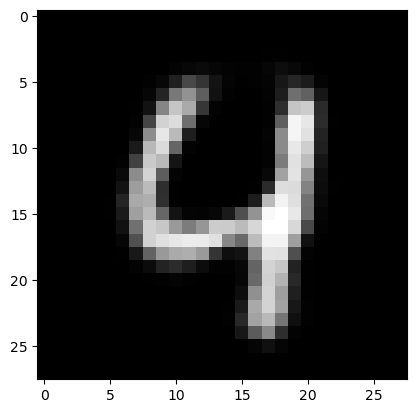

In [39]:
n = 4
print("The Original")
plt.imshow(x_test[n])
plt.show()


print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()


print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

## Lab Logbook requirement:

- Put the model summary for task 1 in you lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.